<a href="https://colab.research.google.com/github/TipsyPanda/ComplexBridges/blob/main/ComplexBridge_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Analysis**

In [50]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

# Paths
DATA_DIR = "/content/drive/MyDrive/ComplexBridge_work/Data/"


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Load the dataset
print("Loading data...")
url = "https://github.com/TipsyPanda/ComplexBridges/raw/main/ipmb_5sensors_30min_1_to_10hz.csv"
bridgeData = pd.read_csv(url)

print("\n" + "="*80)
print("BRIDGE SENSOR DATA ANALYSIS - COMPLETE RESULTS")
print("="*80)

# ============================================================================
# 1. BASIC DATA INFORMATION
# ============================================================================
print("\n[1] DATASET OVERVIEW")
print("-" * 80)
print(f"Total Records: {len(bridgeData):,}")
print(f"Number of Columns: {len(bridgeData.columns)}")
print(f"\nColumn Names:")
for col in bridgeData.columns:
    print(f"  - {col}")

print(f"\nFirst 5 Rows:")
print(bridgeData.head())

Loading data...

BRIDGE SENSOR DATA ANALYSIS - COMPLETE RESULTS

[1] DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Records: 90,000
Number of Columns: 11

Column Names:
  - timestamp
  - bridge_id
  - span_id
  - sensor_id
  - sensor_type
  - value
  - unit
  - traffic_load_proxy
  - rule_threshold
  - anomaly
  - anomaly_type

First 5 Rows:
             timestamp   bridge_id span_id sensor_id        sensor_type  \
0  2025-10-10T12:00:00  BRIDGE_A01  SPAN_1    SG_001       strain_gauge   
1  2025-10-10T12:00:00  BRIDGE_A01  SPAN_2    SG_002       strain_gauge   
2  2025-10-10T12:00:00  BRIDGE_A01  SPAN_1   ACC_101  accelerometer_rms   
3  2025-10-10T12:00:00  BRIDGE_A01  SPAN_2   ACC_102  accelerometer_rms   
4  2025-10-10T12:00:00  BRIDGE_A01  SPAN_2   TMP_201        temperature   

        value         unit  traffic_load_proxy  rule_threshold  anomaly  \
0  118.571847  microstrain                 0.5          200.00        0  

In [53]:
# ============================================================================
# 2. DATA TYPES AND MISSING VALUES
# ============================================================================
print("\n[2] DATA QUALITY CHECK")
print("-" * 80)
print("\nData Types:")
print(bridgeData.dtypes)

print("\n\nMissing Values by Column:")
missing = bridgeData.isna().sum()
print(missing)
print(f"\nTotal Missing Values: {missing.sum()}")
print(f"Note: Missing values in 'anomaly_type' are expected (only populated when anomaly=1)")


[2] DATA QUALITY CHECK
--------------------------------------------------------------------------------

Data Types:
timestamp              object
bridge_id              object
span_id                object
sensor_id              object
sensor_type            object
value                 float64
unit                   object
traffic_load_proxy    float64
rule_threshold        float64
anomaly                 int64
anomaly_type           object
dtype: object


Missing Values by Column:
timestamp                 0
bridge_id                 0
span_id                   0
sensor_id                 0
sensor_type               0
value                     0
unit                      0
traffic_load_proxy        0
rule_threshold            0
anomaly                   0
anomaly_type          86148
dtype: int64

Total Missing Values: 86148
Note: Missing values in 'anomaly_type' are expected (only populated when anomaly=1)


In [54]:
# ============================================================================
# 3. STATISTICAL SUMMARY
# ============================================================================
print("\n[3] STATISTICAL SUMMARY")
print("-" * 80)
print("\nNumeric Columns Statistics:")
print(bridgeData.describe())


[3] STATISTICAL SUMMARY
--------------------------------------------------------------------------------

Numeric Columns Statistics:
              value  traffic_load_proxy  rule_threshold       anomaly
count  90000.000000        90000.000000    90000.000000  90000.000000
mean      60.327781            0.500000       87.020000      0.042800
std       68.617340            0.353593       93.126886      0.202407
min        0.004077            0.000000        0.050000      0.000000
25%        0.021788            0.146000        0.050000      0.000000
50%       22.029184            0.500000       35.000000      0.000000
75%      123.721347            0.854000      200.000000      0.000000
max      286.421924            1.000000      200.000000      1.000000


In [55]:
# ============================================================================
# 4. SENSOR TYPE ANALYSIS
# ============================================================================
print("\n[4] SENSOR TYPE ANALYSIS")
print("-" * 80)
print("\nSensor Type Distribution:")
sensor_counts = bridgeData['sensor_type'].value_counts()
print(sensor_counts)
print(f"\nPercentage Distribution:")
print((sensor_counts / len(bridgeData) * 100).round(2))

print("\n\nValue Statistics by Sensor Type:")
for sensor_type in bridgeData['sensor_type'].unique():
    sensor_data = bridgeData[bridgeData['sensor_type'] == sensor_type]
    unit = sensor_data['unit'].iloc[0]
    print(f"\n{sensor_type.upper()} ({unit}):")
    print(f"  Count: {len(sensor_data):,}")
    print(f"  Mean:  {sensor_data['value'].mean():.4f}")
    print(f"  Std:   {sensor_data['value'].std():.4f}")
    print(f"  Min:   {sensor_data['value'].min():.4f}")
    print(f"  Max:   {sensor_data['value'].max():.4f}")
    print(f"  Threshold: {sensor_data['rule_threshold'].iloc[0]:.4f}")


[4] SENSOR TYPE ANALYSIS
--------------------------------------------------------------------------------

Sensor Type Distribution:
sensor_type
strain_gauge         36000
accelerometer_rms    36000
temperature          18000
Name: count, dtype: int64

Percentage Distribution:
sensor_type
strain_gauge         40.0
accelerometer_rms    40.0
temperature          20.0
Name: count, dtype: float64


Value Statistics by Sensor Type:

STRAIN_GAUGE (microstrain):
  Count: 36,000
  Mean:  139.2951
  Std:   34.5969
  Min:   103.4395
  Max:   286.4219
  Threshold: 200.0000

ACCELEROMETER_RMS (g):
  Count: 36,000
  Mean:  0.0211
  Std:   0.0094
  Min:   0.0041
  Max:   0.1018
  Threshold: 0.0500

TEMPERATURE (C):
  Count: 18,000
  Mean:  23.0067
  Std:   3.0461
  Min:   21.2559
  Max:   34.6401
  Threshold: 35.0000


In [56]:
# ============================================================================
# 5. ANOMALY ANALYSIS
# ============================================================================
print("\n[5] ANOMALY ANALYSIS")
print("-" * 80)
total_records = len(bridgeData)
anomaly_count = bridgeData['anomaly'].sum()
anomaly_rate = (anomaly_count / total_records) * 100

print(f"\nTotal Anomalies: {anomaly_count:,}")
print(f"Normal Records: {total_records - anomaly_count:,}")
print(f"Anomaly Rate: {anomaly_rate:.2f}%")

print("\n\nAnomalies by Sensor Type:")
anomaly_by_sensor = bridgeData[bridgeData['anomaly'] == 1].groupby('sensor_type').size()
print(anomaly_by_sensor)

print("\n\nAnomaly Types:")
anomaly_types = bridgeData[bridgeData['anomaly'] == 1]['anomaly_type'].value_counts()
print(anomaly_types)

print("\n\nAnomalies by Span:")
anomaly_by_span = bridgeData[bridgeData['anomaly'] == 1].groupby('span_id').size()
print(anomaly_by_span)

print("\n\nAnomalies by Sensor ID:")
anomaly_by_sensor_id = bridgeData[bridgeData['anomaly'] == 1].groupby('sensor_id').size()
print(anomaly_by_sensor_id)


[5] ANOMALY ANALYSIS
--------------------------------------------------------------------------------

Total Anomalies: 3,852
Normal Records: 86,148
Anomaly Rate: 4.28%


Anomalies by Sensor Type:
sensor_type
accelerometer_rms     652
strain_gauge         3200
dtype: int64


Anomaly Types:
anomaly_type
drift               3200
threshold_breach     652
Name: count, dtype: int64


Anomalies by Span:
span_id
SPAN_1    3449
SPAN_2     403
dtype: int64


Anomalies by Sensor ID:
sensor_id
ACC_101     401
ACC_102     251
SG_001     3048
SG_002      152
dtype: int64


In [57]:
# ============================================================================
# 6. TRAFFIC LOAD ANALYSIS
# ============================================================================
print("\n[6] TRAFFIC LOAD ANALYSIS")
print("-" * 80)
print(f"\nTraffic Load Proxy Statistics:")
print(f"  Mean: {bridgeData['traffic_load_proxy'].mean():.4f}")
print(f"  Std:  {bridgeData['traffic_load_proxy'].std():.4f}")
print(f"  Min:  {bridgeData['traffic_load_proxy'].min():.4f}")
print(f"  Max:  {bridgeData['traffic_load_proxy'].max():.4f}")

print("\n\nAverage Traffic Load During Anomalies vs Normal:")
normal_traffic = bridgeData[bridgeData['anomaly'] == 0]['traffic_load_proxy'].mean()
anomaly_traffic = bridgeData[bridgeData['anomaly'] == 1]['traffic_load_proxy'].mean()
print(f"  Normal Records: {normal_traffic:.4f}")
print(f"  Anomaly Records: {anomaly_traffic:.4f}")
print(f"  Difference: {anomaly_traffic - normal_traffic:.4f}")


[6] TRAFFIC LOAD ANALYSIS
--------------------------------------------------------------------------------

Traffic Load Proxy Statistics:
  Mean: 0.5000
  Std:  0.3536
  Min:  0.0000
  Max:  1.0000


Average Traffic Load During Anomalies vs Normal:
  Normal Records: 0.4962
  Anomaly Records: 0.5850
  Difference: 0.0888


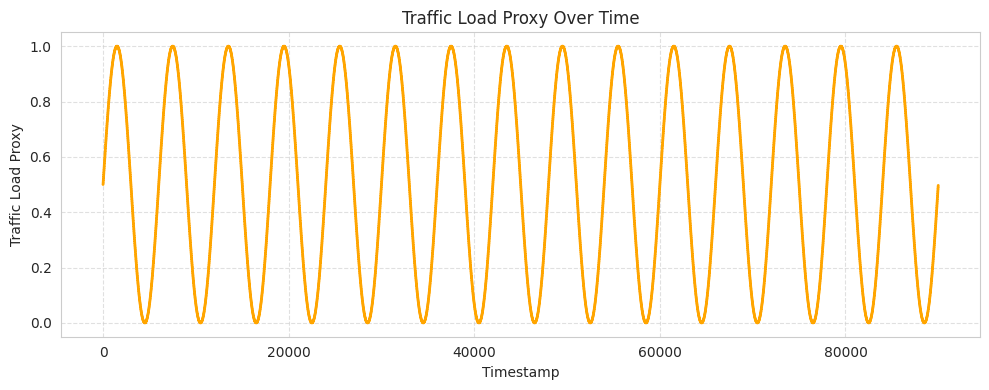

In [58]:
#visualization of how the bridge’s simulated traffic load changes over time
plt.figure(figsize=(10, 4))
plt.plot(bridgeData.index, bridgeData['traffic_load_proxy'], color='orange', linewidth=2)

plt.title("Traffic Load Proxy Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Traffic Load Proxy")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [59]:
# ============================================================================
# 7. BRIDGE AND SPAN INFORMATION
# ============================================================================
print("\n[7] BRIDGE STRUCTURE INFORMATION")
print("-" * 80)
print(f"\nBridge ID: {bridgeData['bridge_id'].unique()[0]}")
print(f"Number of Spans: {bridgeData['span_id'].nunique()}")
print(f"Span IDs: {', '.join(bridgeData['span_id'].unique())}")
print(f"Number of Sensors: {bridgeData['sensor_id'].nunique()}")
print(f"Sensor IDs: {', '.join(bridgeData['sensor_id'].unique())}")

print("\n\nRecords by Span:")
print(bridgeData['span_id'].value_counts())

print("\n\nSensors by Span:")
for span in bridgeData['span_id'].unique():
    span_data = bridgeData[bridgeData['span_id'] == span]
    sensors = span_data['sensor_id'].unique()
    print(f"  {span}: {', '.join(sensors)}")


[7] BRIDGE STRUCTURE INFORMATION
--------------------------------------------------------------------------------

Bridge ID: BRIDGE_A01
Number of Spans: 2
Span IDs: SPAN_1, SPAN_2
Number of Sensors: 5
Sensor IDs: SG_001, SG_002, ACC_101, ACC_102, TMP_201


Records by Span:
span_id
SPAN_2    54000
SPAN_1    36000
Name: count, dtype: int64


Sensors by Span:
  SPAN_1: SG_001, ACC_101
  SPAN_2: SG_002, ACC_102, TMP_201




Generating visualizations...
✓ Visualizations saved as 'bridge_analysis.png'


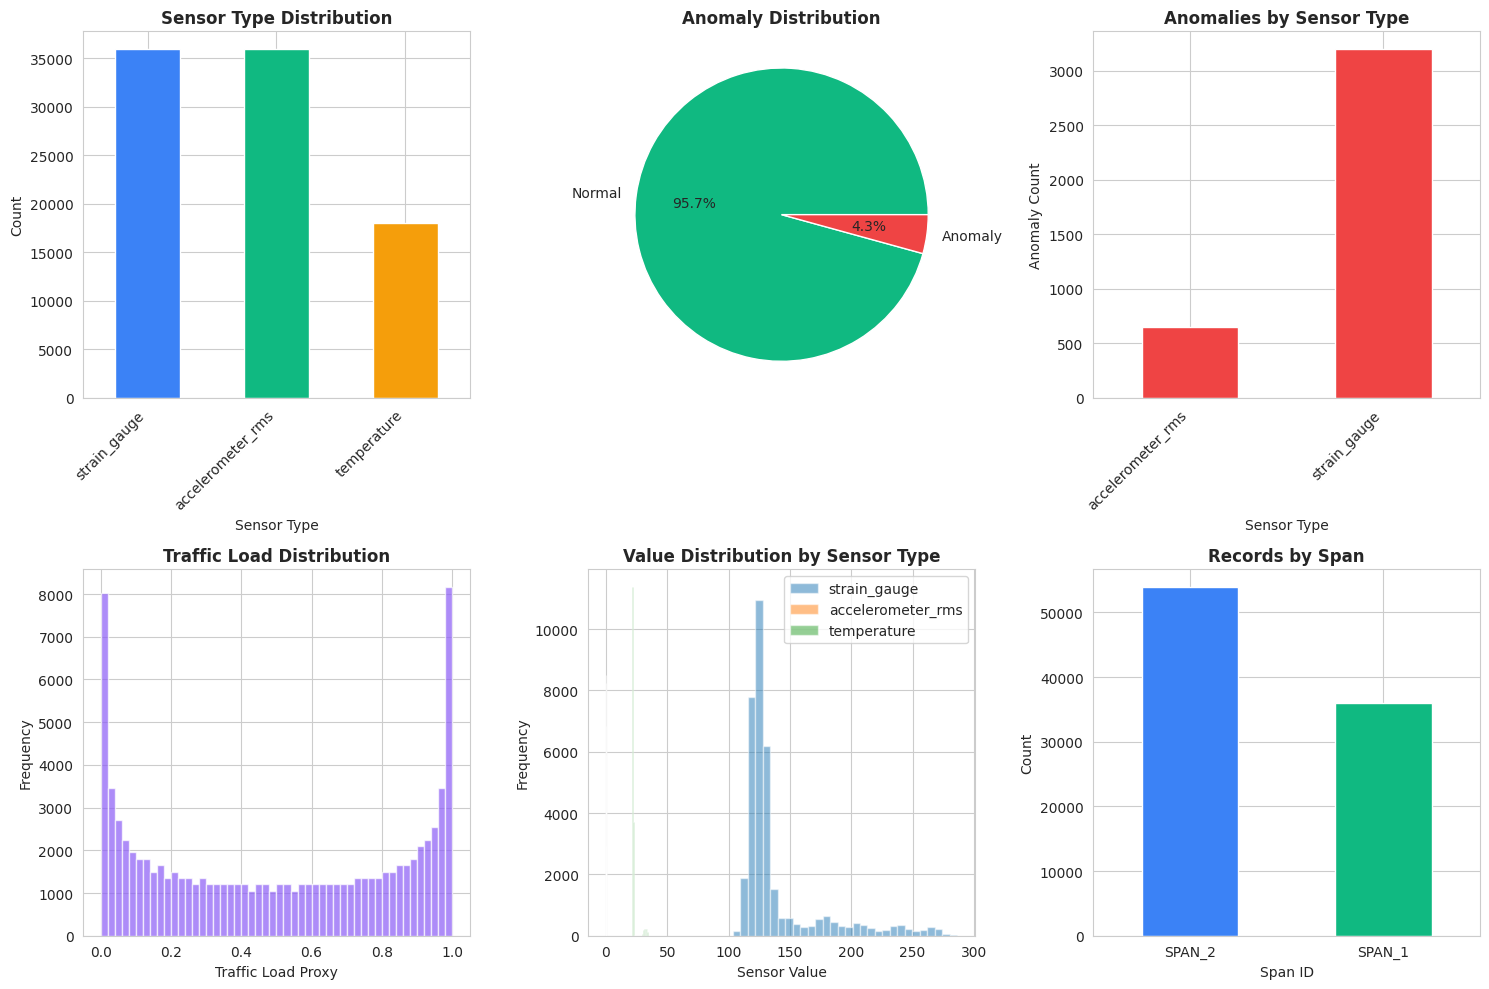


All analysis complete!


In [60]:
# ============================================================================
# 9. CREATE VISUALIZATIONS
# ============================================================================
print("\n\nGenerating visualizations...")

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plot 1: Sensor Type Distribution
plt.subplot(2, 3, 1)
sensor_counts.plot(kind='bar', color=['#3b82f6', '#10b981', '#f59e0b'])
plt.title('Sensor Type Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Sensor Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Plot 2: Anomaly Distribution
plt.subplot(2, 3, 2)
anomaly_dist = bridgeData['anomaly'].value_counts()
colors = ['#10b981', '#ef4444']
plt.pie(anomaly_dist, labels=['Normal', 'Anomaly'], autopct='%1.1f%%', colors=colors)
plt.title('Anomaly Distribution', fontsize=12, fontweight='bold')

# Plot 3: Anomalies by Sensor Type
plt.subplot(2, 3, 3)
anomaly_by_sensor.plot(kind='bar', color='#ef4444')
plt.title('Anomalies by Sensor Type', fontsize=12, fontweight='bold')
plt.xlabel('Sensor Type')
plt.ylabel('Anomaly Count')
plt.xticks(rotation=45, ha='right')

# Plot 4: Traffic Load Distribution
plt.subplot(2, 3, 4)
plt.hist(bridgeData['traffic_load_proxy'], bins=50, color='#8b5cf6', alpha=0.7)
plt.title('Traffic Load Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Traffic Load Proxy')
plt.ylabel('Frequency')

# Plot 5: Value Distribution by Sensor Type
plt.subplot(2, 3, 5)
for sensor_type in bridgeData['sensor_type'].unique():
    sensor_data = bridgeData[bridgeData['sensor_type'] == sensor_type]['value']
    plt.hist(sensor_data, bins=30, alpha=0.5, label=sensor_type)
plt.title('Value Distribution by Sensor Type', fontsize=12, fontweight='bold')
plt.xlabel('Sensor Value')
plt.ylabel('Frequency')
plt.legend()

# Plot 6: Records by Span
plt.subplot(2, 3, 6)
bridgeData['span_id'].value_counts().plot(kind='bar', color=['#3b82f6', '#10b981'])
plt.title('Records by Span', fontsize=12, fontweight='bold')
plt.xlabel('Span ID')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('bridge_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'bridge_analysis.png'")
plt.show()

print("\nAll analysis complete!")

In [61]:
#Convert timestamps from text to a datetime format
bridgeData['timestamp'] = pd.to_datetime(bridgeData['timestamp'], format='ISO8601')

#Use timestamps as the main index (add lables 1, 2, 3, ...)
bridgeData.set_index('timestamp', inplace=True)


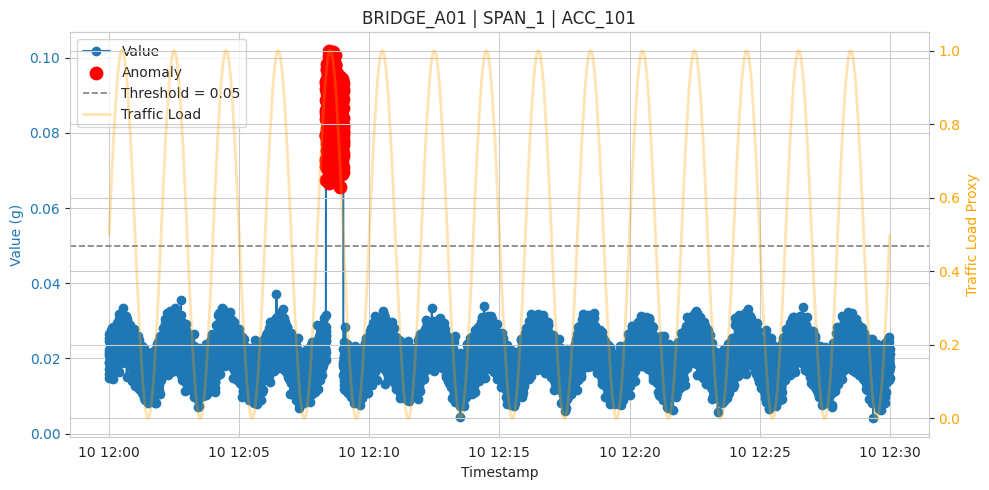

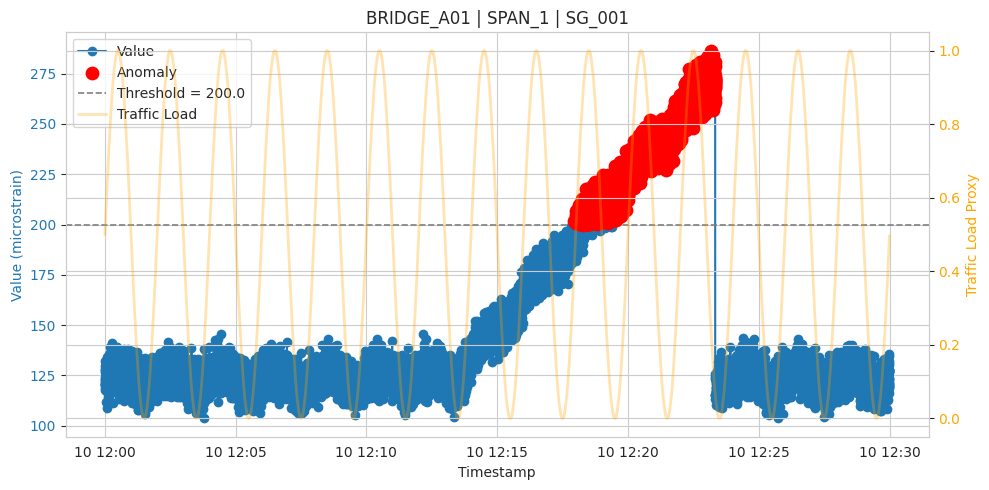

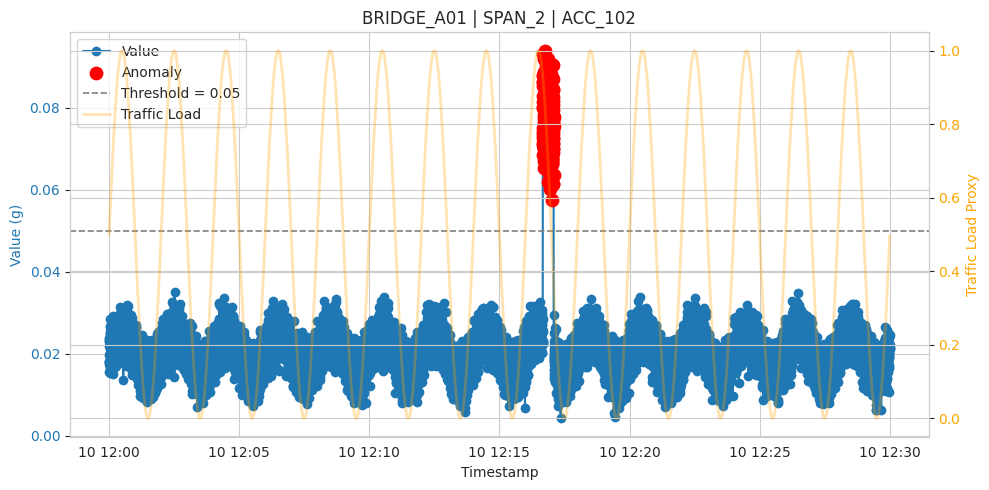

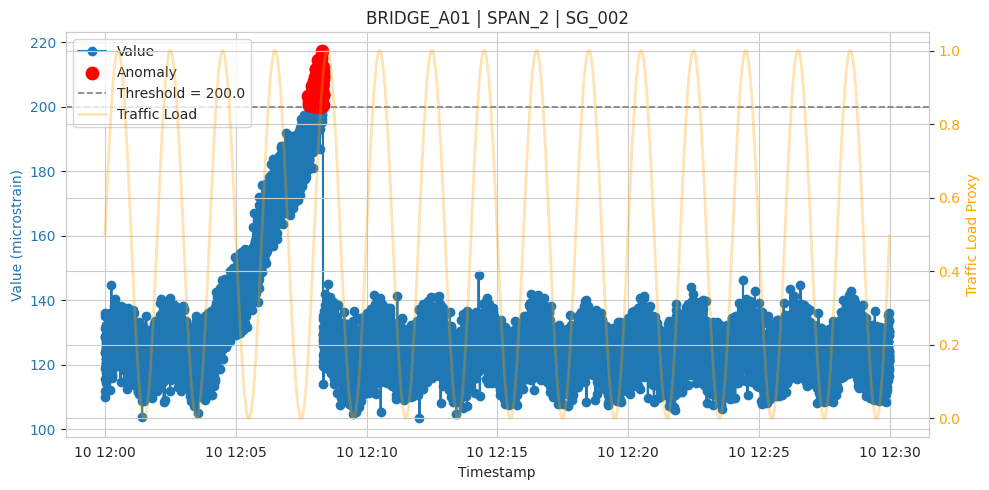

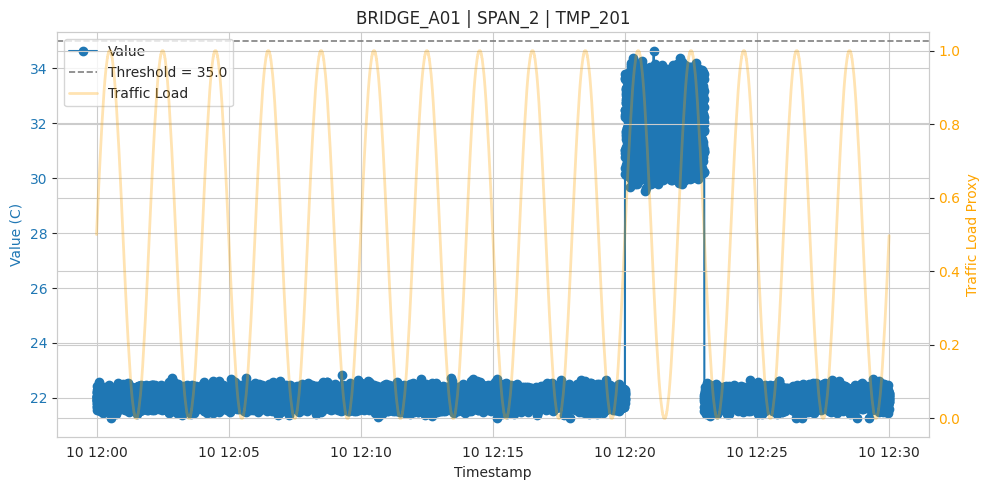

In [62]:
# Ensure anomaly is numeric (0/1)
bridgeData['anomaly'] = pd.to_numeric(bridgeData['anomaly'], errors='coerce').fillna(0).astype(int)

# Group the data by asset location and sensor
grouped = bridgeData.groupby(['bridge_id', 'span_id','sensor_id'])

# Loop through groups and prep subsets
for (bridge, span, sensor), group in grouped:
    group = group.sort_index()
    normal = group[group['anomaly'] == 0]
    anoms  = group[group['anomaly'] == 1]

    #Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # --- Left y-axis: Sensor value ---
    ax1.plot(group.index, group['value'], marker='o', label='Value', color='tab:blue')
    if not anoms.empty:
        ax1.scatter(anoms.index, anoms['value'], s=80, c='red', label='Anomaly', zorder=3)

    # Threshold line
    if group['rule_threshold'].nunique() == 1:
        thr = group['rule_threshold'].iloc[0]
        ax1.axhline(thr, linestyle='--', linewidth=1.2, color='gray', label=f'Threshold = {thr}')
    else:
        ax1.plot(group.index, group['rule_threshold'], linestyle='--', linewidth=1.2, color='gray', label='Threshold')

    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel(f"Value ({group['unit'].iloc[0]})", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # --- Right y-axis: Traffic load proxy ---
    ax2 = ax1.twinx()
    ax2.plot(group.index, group['traffic_load_proxy'], color='orange', alpha=0.3, linewidth=2, label='Traffic Load')
    ax2.set_ylabel("Traffic Load Proxy", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # --- Titles & Legend ---
    plt.title(f"{bridge} | {span} | {sensor}")
    ax1.grid(True)
    fig.tight_layout()

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

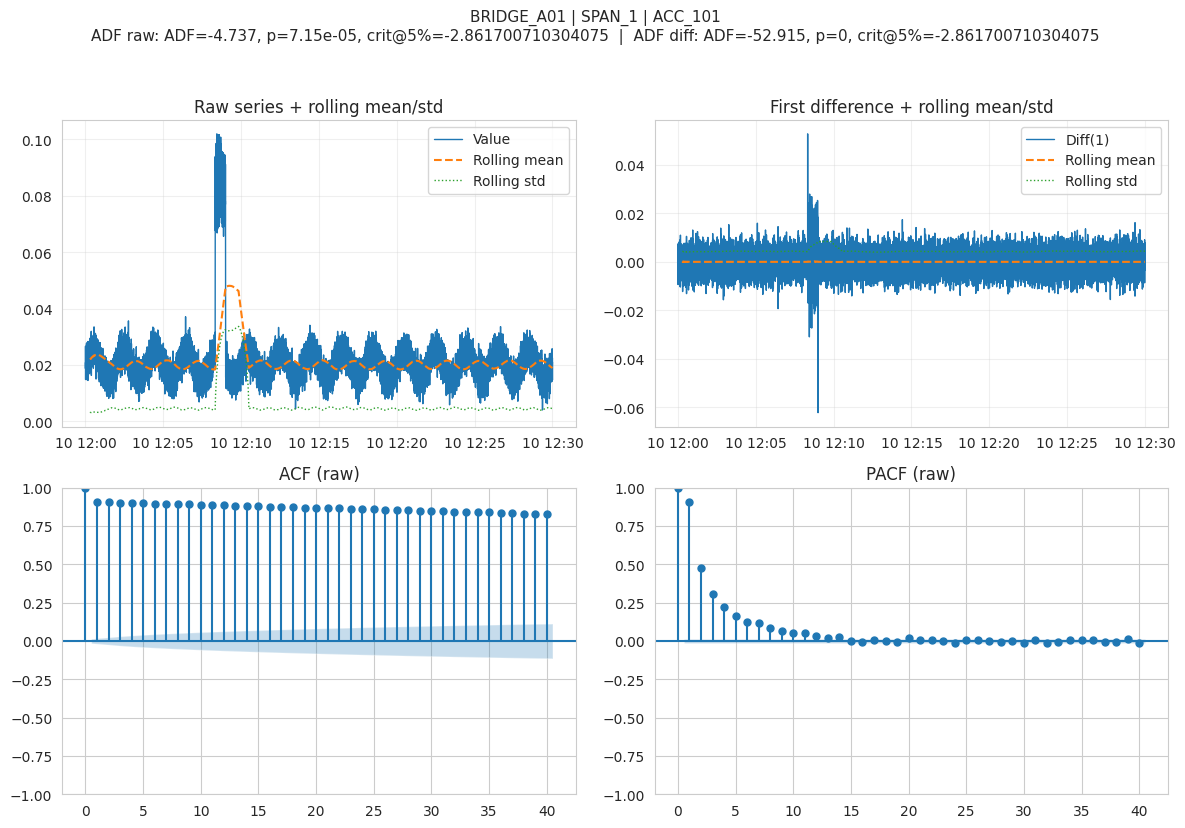

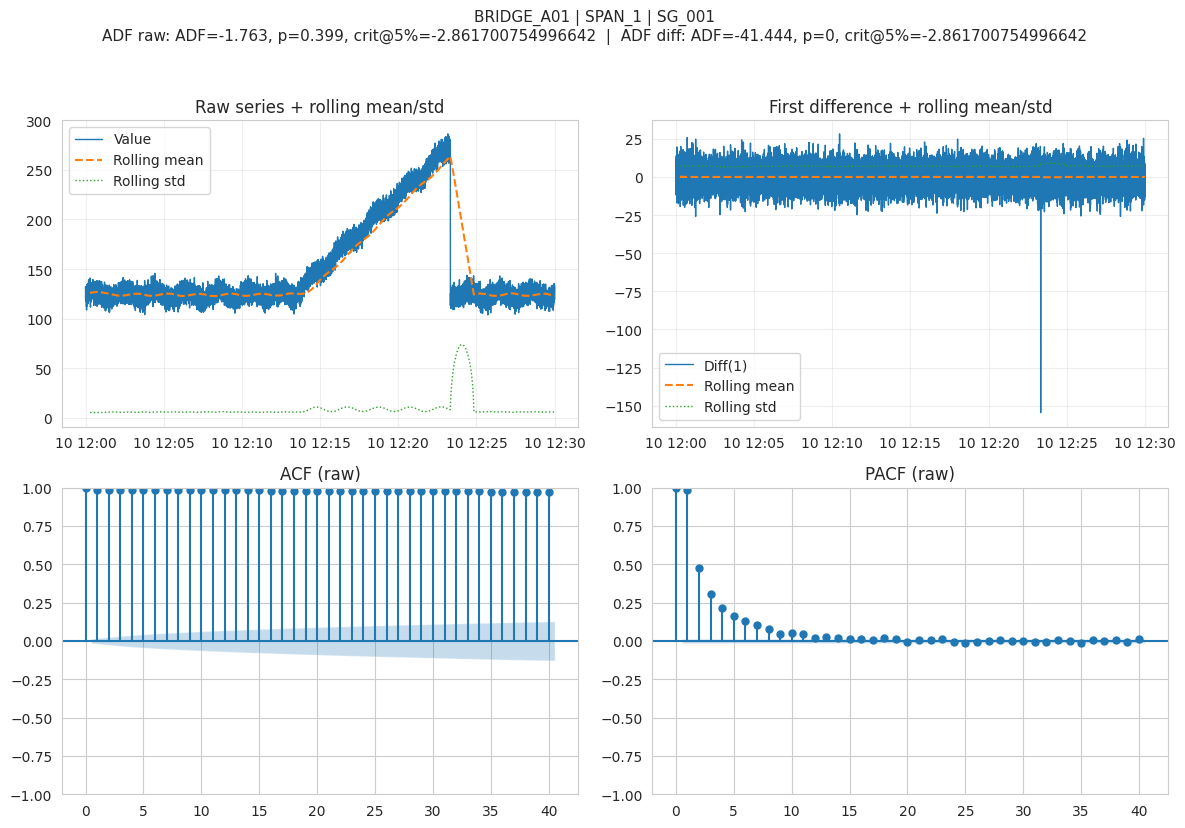

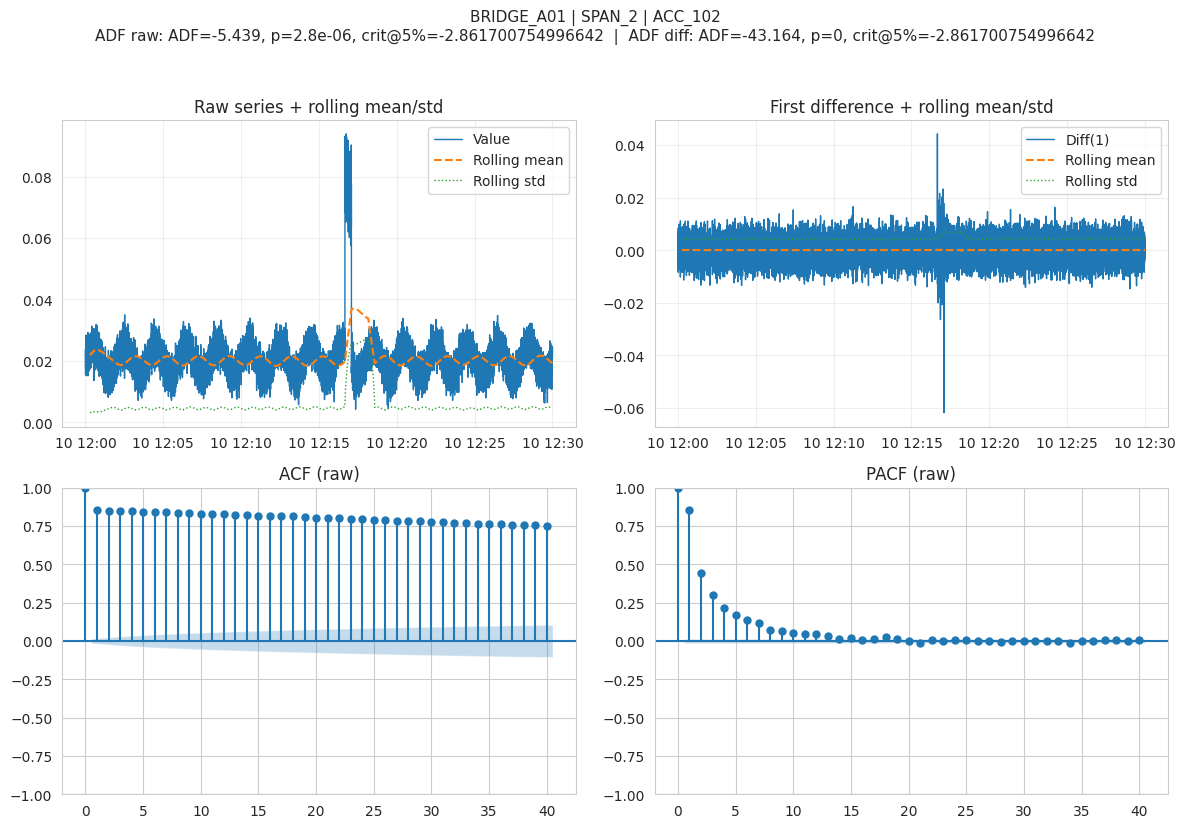

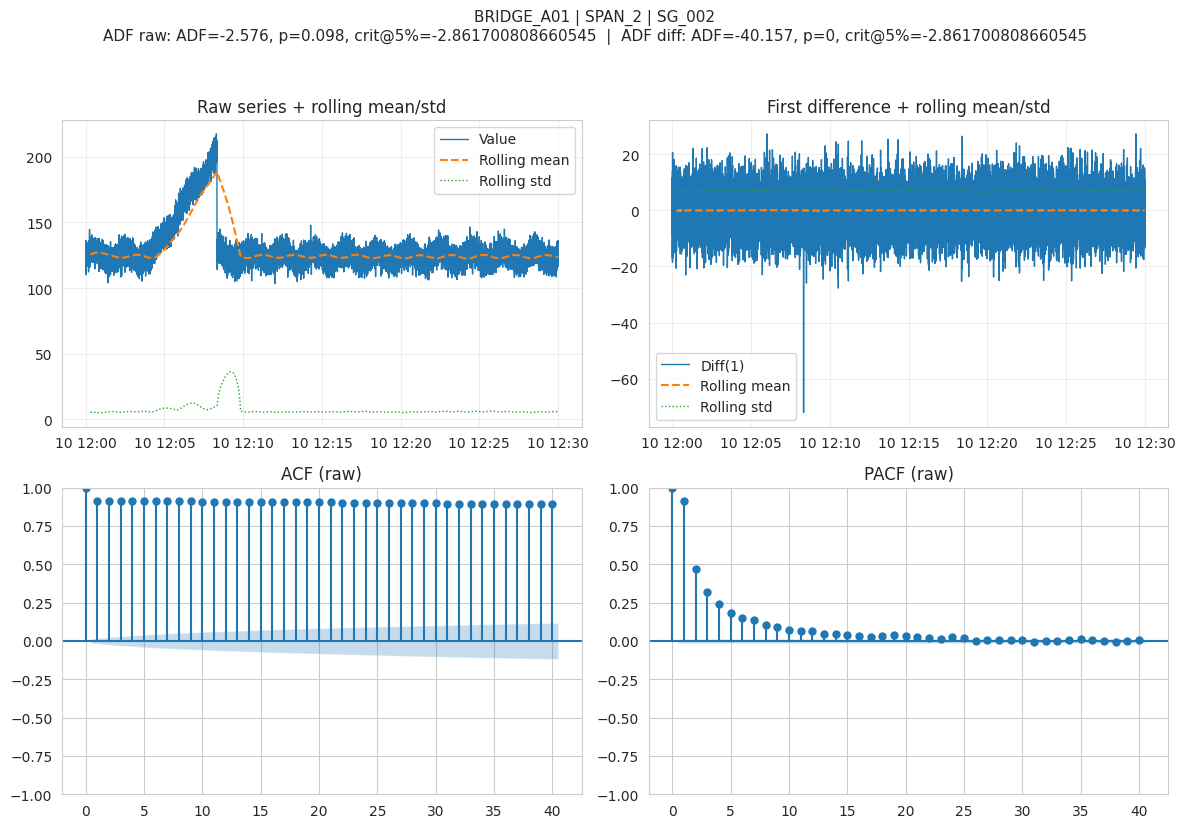

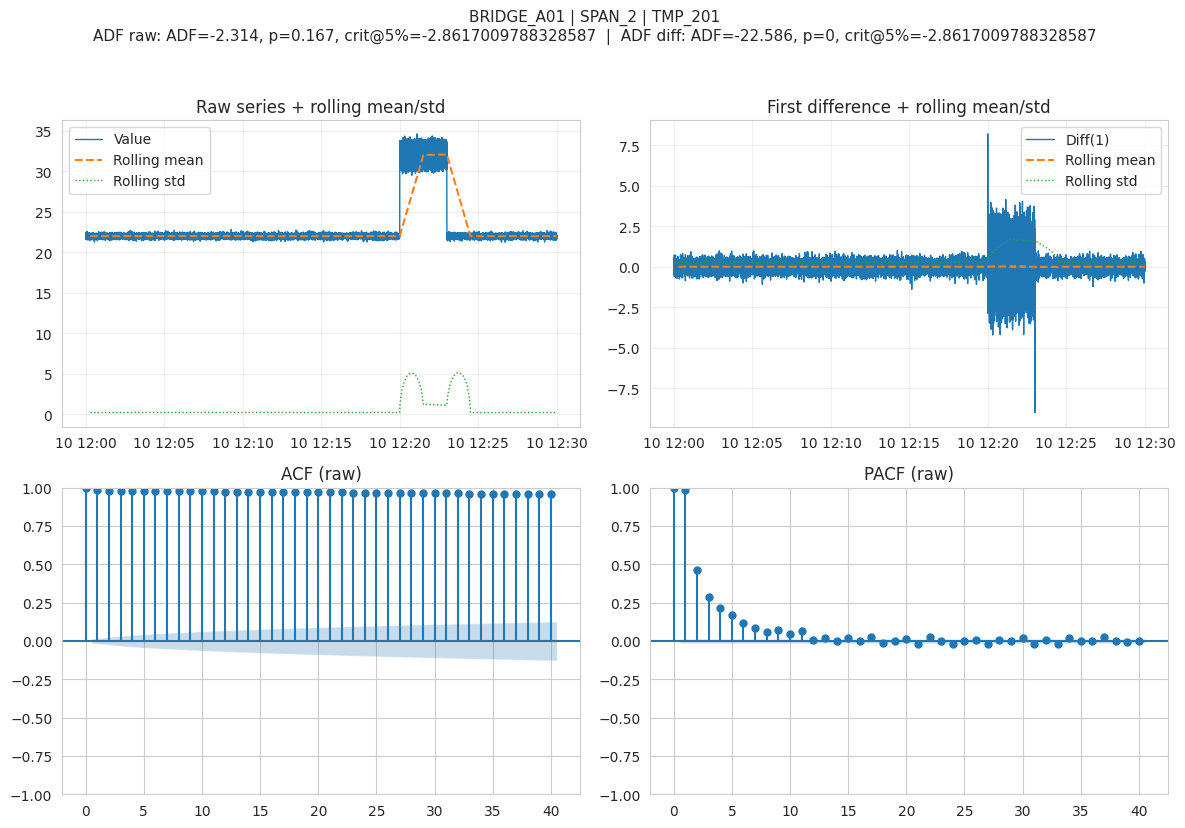

In [63]:
# ---- Imports ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ---- Helper: ADF pretty printer ----
def adf_summary(x):
    x = pd.Series(x).dropna()
    if len(x) < 10:
        return {"ok": False, "note": "Too few points (<10) for ADF"}
    try:
        adf_stat, pval, usedlag, nobs, crit, icbest = adfuller(x, autolag='AIC')
        return {
            "ok": True,
            "adf_stat": adf_stat,
            "pval": pval,
            "crit": crit
        }
    except Exception as e:
        return {"ok": False, "note": f"ADF error: {e}"}

# ---- Main plotting function per group ----
def plot_stationarity_per_sensor(bridgeData, group_cols=('bridge_id','span_id','sensor_id'),
                                 value_col='value', min_points=50, lags=40):
    """
    Creates a 2x2 diagnostic plot per sensor_id group:
    (1) raw with rolling mean/std, (2) 1st difference with rolling mean/std, (3) ACF, (4) PACF.
    Adds ADF test results for raw and diff series to the suptitle.
    Assumes DatetimeIndex; sorts index per group. Skips tiny groups.
    """
    grouped = bridgeData.groupby(list(group_cols))
    for keys, g in grouped:
        g = g.sort_index()
        s = g[value_col].astype(float).dropna()
        if not isinstance(g.index, pd.DatetimeIndex):
            # If index isn't time, try to coerce from a timestamp column if present
            # (comment this out if your index is already a DatetimeIndex)
            if 'timestamp' in g.columns:
                g = g.set_index(pd.to_datetime(g['timestamp']))
                g = g.sort_index()
                s = g[value_col].astype(float).dropna()
        if s.size < min_points:
            continue  # skip very short series

        # Choose a reasonable rolling window (5% of length, at least 20)
        win = max(20, int(len(s) * 0.05))

        # Raw rolling stats
        roll_mean = s.rolling(win, min_periods=max(5, win//5)).mean()
        roll_std  = s.rolling(win, min_periods=max(5, win//5)).std()

        # First difference
        d1 = s.diff().dropna()
        d1_roll_mean = d1.rolling(win, min_periods=max(5, win//5)).mean()
        d1_roll_std  = d1.rolling(win, min_periods=max(5, win//5)).std()

        # ADF tests
        adf_raw = adf_summary(s)
        adf_d1  = adf_summary(d1)

        # ---- Plot ----
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        ax_ts, ax_diff, ax_acf, ax_pacf = axes.ravel()

        # (1) Raw with rolling mean/std
        ax_ts.plot(s.index, s.values, lw=1, label='Value')
        ax_ts.plot(roll_mean.index, roll_mean.values, lw=1.5, linestyle='--', label='Rolling mean')
        ax_ts.plot(roll_std.index, roll_std.values, lw=1.0, linestyle=':', label='Rolling std')
        ax_ts.set_title("Raw series + rolling mean/std")
        ax_ts.grid(True, alpha=0.3)
        ax_ts.legend(loc='best')

        # (2) First difference with rolling mean/std
        ax_diff.plot(d1.index, d1.values, lw=1, label='Diff(1)')
        ax_diff.plot(d1_roll_mean.index, d1_roll_mean.values, lw=1.5, linestyle='--', label='Rolling mean')
        ax_diff.plot(d1_roll_std.index, d1_roll_std.values, lw=1.0, linestyle=':', label='Rolling std')
        ax_diff.set_title("First difference + rolling mean/std")
        ax_diff.grid(True, alpha=0.3)
        ax_diff.legend(loc='best')

        # (3) ACF on raw (fallback to diff if raw too short)
        try:
            plot_acf(s.dropna(), ax=ax_acf, lags=min(lags, len(s)-2))
            ax_acf.set_title("ACF (raw)")
        except Exception:
            plot_acf(d1.dropna(), ax=ax_acf, lags=min(lags, len(d1)-2))
            ax_acf.set_title("ACF (diff)")

        # (4) PACF on raw (fallback to diff if needed)
        try:
            plot_pacf(s.dropna(), ax=ax_pacf, lags=min(lags, len(s)-2), method='ywm')
            ax_pacf.set_title("PACF (raw)")
        except Exception:
            plot_pacf(d1.dropna(), ax=ax_pacf, lags=min(lags, len(d1)-2), method='ywm')
            ax_pacf.set_title("PACF (diff)")

        # Suptitle with ADF summaries
        def fmt_adf(res):
            if not res.get("ok", False):
                return res.get("note", "n/a")
            return f"ADF={res['adf_stat']:.3f}, p={res['pval']:.3g}, crit@5%={res['crit'].get('5%', 'n/a')}"

        title_left = " | ".join(map(str, keys))
        title_right = f"ADF raw: {fmt_adf(adf_raw)}  |  ADF diff: {fmt_adf(adf_d1)}"
        fig.suptitle(f"{title_left}\n{title_right}", y=1.03, fontsize=11)

        fig.tight_layout()
        plt.show()

# ---- Call it on your DataFrame (assumes DatetimeIndex already set) ----
plot_stationarity_per_sensor(bridgeData)


In [64]:
#Save data to pickle to read in next notebook
bridgeData.to_pickle(DATA_DIR+"DF_BridgeData_cleaned.pkl")

### WORK IN PROGRESS:

In [65]:
# Read in the dataset
url = "https://github.com/TipsyPanda/ComplexBridges/raw/main/ipmb_5sensors_30min_1_to_10hz.csv"
bridgeData = pd.read_csv(url)

In [66]:
# Look at the first rows of the dataset
bridgeData.head()

,timestamp,bridge_id,span_id,sensor_id,sensor_type,value,unit,traffic_load_proxy,rule_threshold,anomaly,anomaly_type
0,2025-10-10T12:00:00,BRIDGE_A01,SPAN_1,SG_001,strain_gauge,118.571847,microstrain,0.5,200.00,0,NaN
1,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,SG_002,strain_gauge,128.986727,microstrain,0.5,200.00,0,NaN
2,2025-10-10T12:00:00,BRIDGE_A01,SPAN_1,ACC_101,accelerometer_rms,0.020849,g,0.5,0.05,0,NaN
3,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,ACC_102,accelerometer_rms,0.015481,g,0.5,0.05,0,NaN
4,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,TMP_201,temperature,21.884280,C,0.5,35.00,0,NaN


In [67]:
# Summary of the dataset
bridgeData.info()

# Frequency of each sensor type
bridgeData['sensor_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           90000 non-null  object 
 1   bridge_id           90000 non-null  object 
 2   span_id             90000 non-null  object 
 3   sensor_id           90000 non-null  object 
 4   sensor_type         90000 non-null  object 
 5   value               90000 non-null  float64
 6   unit                90000 non-null  object 
 7   traffic_load_proxy  90000 non-null  float64
 8   rule_threshold      90000 non-null  float64
 9   anomaly             90000 non-null  int64  
 10  anomaly_type        3852 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ MB


,count
sensor_type,
strain_gauge,36000
accelerometer_rms,36000
temperature,18000


In [68]:
#Number of missing entries per column
bridgeData.isna().sum()
#only empty values in anomaly type since it only shows if there is an anomaly

,0
timestamp,0
bridge_id,0
span_id,0
sensor_id,0
sensor_type,0
value,0
unit,0
traffic_load_proxy,0
rule_threshold,0
anomaly,0


In [69]:
# Statistical summary of all numeric columns in the dataset
bridgeData.describe()

,value,traffic_load_proxy,rule_threshold,anomaly
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,60.327781,0.500000,87.020000,0.042800
std,68.617340,0.353593,93.126886,0.202407
min,0.004077,0.000000,0.050000,0.000000
25%,0.021788,0.146000,0.050000,0.000000
50%,22.029184,0.500000,35.000000,0.000000
75%,123.721347,0.854000,200.000000,0.000000
max,286.421924,1.000000,200.000000,1.000000


In [70]:
#Statistical summary of the "value" per "sensor_type"
bridgeData.groupby('sensor_type')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
sensor_type,,,,,,,,
accelerometer_rms,36000.0,0.021058,0.009373,0.004077,0.016588,0.020059,0.023609,0.101841
strain_gauge,36000.0,139.295070,34.596890,103.439485,121.304125,126.163869,134.024581,286.421924
temperature,18000.0,23.006651,3.046133,21.255939,21.881168,22.029184,22.195111,34.640107


In [71]:
#Statistical summary of value per sensor_id
bridgeData.groupby(['sensor_id'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
sensor_id,,,,,,,,
ACC_101,18000.0,0.021343,0.010469,0.004077,0.016584,0.020067,0.023626,0.101841
ACC_102,18000.0,0.020773,0.008122,0.004201,0.016593,0.020051,0.023581,0.093898
SG_001,18000.0,149.023253,43.694536,103.701213,122.001249,127.610315,160.099800,286.421924
SG_002,18000.0,129.566887,17.188891,103.439485,120.699590,125.065082,130.503170,217.411624
TMP_201,18000.0,23.006651,3.046133,21.255939,21.881168,22.029184,22.195111,34.640107


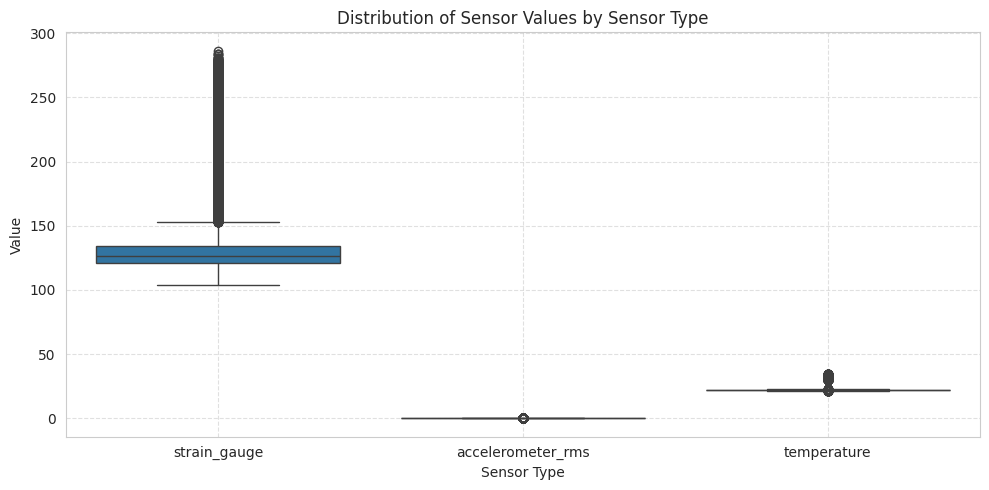

In [72]:
#Box plot of “value” per sensor_type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='sensor_type', y='value', data=bridgeData)
plt.title("Distribution of Sensor Values by Sensor Type")
plt.xlabel("Sensor Type")
plt.ylabel("Value")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [73]:
bridgeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           90000 non-null  object 
 1   bridge_id           90000 non-null  object 
 2   span_id             90000 non-null  object 
 3   sensor_id           90000 non-null  object 
 4   sensor_type         90000 non-null  object 
 5   value               90000 non-null  float64
 6   unit                90000 non-null  object 
 7   traffic_load_proxy  90000 non-null  float64
 8   rule_threshold      90000 non-null  float64
 9   anomaly             90000 non-null  int64  
 10  anomaly_type        3852 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ MB


In [74]:
# Look at the first rows of the dataset
bridgeData.head()

,timestamp,bridge_id,span_id,sensor_id,sensor_type,value,unit,traffic_load_proxy,rule_threshold,anomaly,anomaly_type
0,2025-10-10T12:00:00,BRIDGE_A01,SPAN_1,SG_001,strain_gauge,118.571847,microstrain,0.5,200.00,0,NaN
1,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,SG_002,strain_gauge,128.986727,microstrain,0.5,200.00,0,NaN
2,2025-10-10T12:00:00,BRIDGE_A01,SPAN_1,ACC_101,accelerometer_rms,0.020849,g,0.5,0.05,0,NaN
3,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,ACC_102,accelerometer_rms,0.015481,g,0.5,0.05,0,NaN
4,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,TMP_201,temperature,21.884280,C,0.5,35.00,0,NaN
